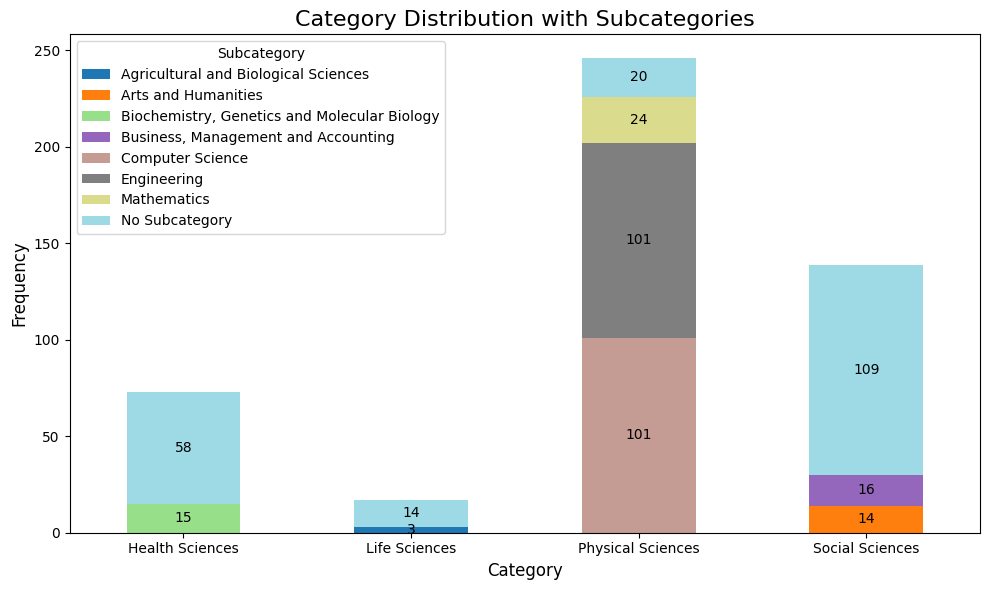

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'formatted_journals_with_subcategories.csv'
data = pd.read_csv(file_path)

# Combine the three subcategory columns into a single list and analyze the distribution
combined_subcategories = pd.concat([data['Subcategory'], data['Subcategory.1'], data['Subcategory.2']])

# Drop any NaN values and analyze the distribution
combined_subcategory_distribution = combined_subcategories.dropna().value_counts()

# Create a mapping between each subcategory and its associated category
category_subcategory_map = {
    'Social Sciences': ['Business, Management and Accounting', 'Arts and Humanities'],
    'Physical Sciences': ['Computer Science', 'Engineering', 'Mathematics'],
    'Health Sciences': ['Biochemistry, Genetics and Molecular Biology'],
    'Life Sciences': ['Agricultural and Biological Sciences']
}

# Prepare a dataframe to hold category and subcategory information
subcategory_data = []

for category, subcategories in category_subcategory_map.items():
    for subcategory in subcategories:
        count = combined_subcategory_distribution.get(subcategory, 0)
        subcategory_data.append({'Category': category, 'Subcategory': subcategory, 'Count': count})

# Count the number of papers that have a category but no subcategory
category_only_counts = data[(data['Subcategory'].isna()) & (data['Subcategory.1'].isna()) & (data['Subcategory.2'].isna())]['Category'].value_counts()

# Add papers with only category and no subcategory to the data
for category, count in category_only_counts.items():
    subcategory_data.append({'Category': category, 'Subcategory': 'No Subcategory', 'Count': count})

# Convert updated data to dataframe
updated_subcategory_df = pd.DataFrame(subcategory_data)

# Calculate total category counts and add them to the data
total_category_counts = data['Category'].value_counts()

for category, count in total_category_counts.items():
    subcategory_data.append({'Category': category, 'Subcategory': 'Total Category Count', 'Count': count})

# Create the final dataframe for plotting
final_subcategory_df = pd.DataFrame(subcategory_data)

# Pivot the data to make it suitable for a stacked bar chart
pivot_df = updated_subcategory_df.pivot(index='Category', columns='Subcategory', values='Count').fillna(0)

# Plot the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Add labels and title
plt.title('Category Distribution with Subcategories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-axis labels to landscape orientation
plt.xticks(rotation=0)

# Annotate each bar with the count number, but only display numbers greater than 0
for container in ax.containers:
    labels = [f'{v:.0f}' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

# Display the plot with landscape labels and no zero annotations
plt.tight_layout()
plt.show()
